#**Data Mining**

---


# Ali H Ahmad
### 2022
This kernel aims to predict car insurance cold call success. It shows data exploration and visualization, along with feature engineering and model selection.

**Notice:** This is a modification of a notebook created by Emma Ren in July 2017, I also believe she is the owner of this dataset.

## **For google colab**

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import the necessary packages && Load data**

In [68]:
%matplotlib inline
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [69]:
# Read-in train and test datasets
train = pd.read_csv('/content/drive/MyDrive/carInsurance_train.csv')
test = pd.read_csv('/content/drive/MyDrive/carInsurance_test.csv')

##**Exploratory Data Analysis (EDA) & Description and clarification of the data**

The famous saying "one picture is worth a thousand words" holds true in the scope of data visualizations as well.

**Exploratory Data Analysis (EDA)** is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.



In [70]:
print('The train dataset has %d examples and %d features' % (train.shape[0], train.shape[1]))
print('The test dataset has %d examples and %d features' % (test.shape[0], test.shape[1]))

The train dataset has 4000 examples and 19 features
The test dataset has 1000 examples and 19 features


In [71]:
# Explore the dataframe
train.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [72]:
# Data type information of each columns
train.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [73]:
# Is it a balanced dataset?
train['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

<br>

--------------------------------------------------------------------
**Statistical summary of data frame using describe() function:**

---
<br>
[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) is used to view some basic statistical details like percentile, mean, std etc.

**Syntax:**

dataframe.describe(percentiles, include, exclude datetime_is_numeric) 

* ***percentile:*** Optional, a list of percentiles to include in the result, default is [.25, .50, .75].
* ***include:*** Optional, a list of the data types to allow in the result.
* ***exclude:*** Optional, a list of the data types to disallow in the result.
* ***datetime_is_numeric:*** Optional, default False. Set to True to treat datetime data as numeric 

<br>

For columns that contain numeric data, the description will contain this information for each column:

    * count - The number of not-empty values.
    * mean - The average (mean) value.
    * std - The standard deviation.
    * min - the minimum value.
    * 25% - The 25% percentile*.
    * 50% - The 50% percentile*.
    * 75% - The 75% percentile*.
    * max - the maximum value.


***Percentile meaning:*** how many of the values are less than the given percentile.

In [74]:
# View stats for numerical data
train.drop('Id',axis=1).describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [75]:
# View stats for object data
train.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


<br>

---
**Correlation Matrix**

---
The correlation matrix is a matrix that shows the correlations between all the variables.

- ***Correlation*** is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect (it’s a measure of how things are related).

- ***A correlation coefficient*** is a way to put a value to the relationship. Correlation coefficients have a value of between -1 and 1. A “0” means there is no relationship between the variables at all, while -1 or 1 means that there is a perfect negative or positive correlation (negative or positive correlation here refers to the type of graph the relationship will produce).
<br>

        Graphs showing a correlation of -1, 0 and +1

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

<br>
<br>
We can express the correlation matrix with a ***heatmap***.
Heatmap is a useful tool to get a quick understanding of which variables are important.

***Heatmap*** is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the **[seaborn.heatmap()](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjA84jF6rH3AhXUgc4BHU4RAHQQFnoECAQQAQ&url=https%3A%2F%2Fseaborn.pydata.org%2Fgenerated%2Fseaborn.heatmap.html&usg=AOvVaw3xkN-QqF8MecXtX2tKETc0)** function.


**Syntax:**

seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, **kwargs)

Important Parameters:

* ***data:*** 2D dataset that can be coerced into an ndarray.
* ***vmin, vmax:*** Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
* ***cmap:*** The mapping from data values to color space.
* ***center:*** The value at which to center the colormap when plotting divergent data.
* ***annot:*** If True, write the data value in each cell.
* ***fmt:*** String formatting code to use when adding annotations.
* ***linewidths:*** Width of the lines that will divide each cell.
* ***linecolor:*** Color of the lines that will divide each cell.
* ***cbar:*** Whether to draw a colorbar. 

All the parameters except data are optional.
Returns: An object of type matplotlib.axes._subplots.AxesSubplot 

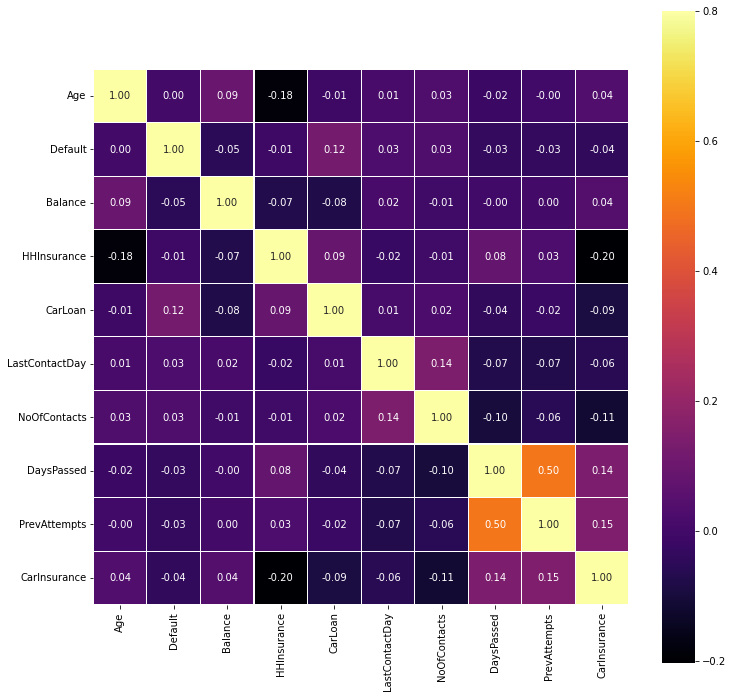

In [76]:
# First check out correlations among numeric features
colormap = plt.cm.inferno
cor = train.drop('Id',axis=1).corr() # to create correlation matrix
plt.figure(figsize=(12,12))
# Draw it using heatmap
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',
            square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

Features are fairly independent, except DaysPassed and PreAttempts. Cold call success is positively correlated with PreAttemps,DaysPassed,Age and Balance, and negatively correlated with default, HHInsurance, CarLoan, LastContactDay and NoOfContacts.


<br>



---



**More EDA**

---



The **[pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** function of seaborn helps in creating an axes grid through which each numeric variable present in data is shared across y-axes in the form of rows and across x-axes in form of a column. Scatter plots are created to show pairwise relationships (explain a relationship between two variables ) and in the diagonal to show the distribution of the data in the column (histogram of each variable and number of occurrences).
<br><br>

**syntax:**

seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

* ***data:***dataframe where each column is a variable and each row is an observation.
* ***hue:*** hue parameter can be used for plotting a pairplot. The hue parameter helps us to categorize data based on a column.

They are all optional except for the first parameter



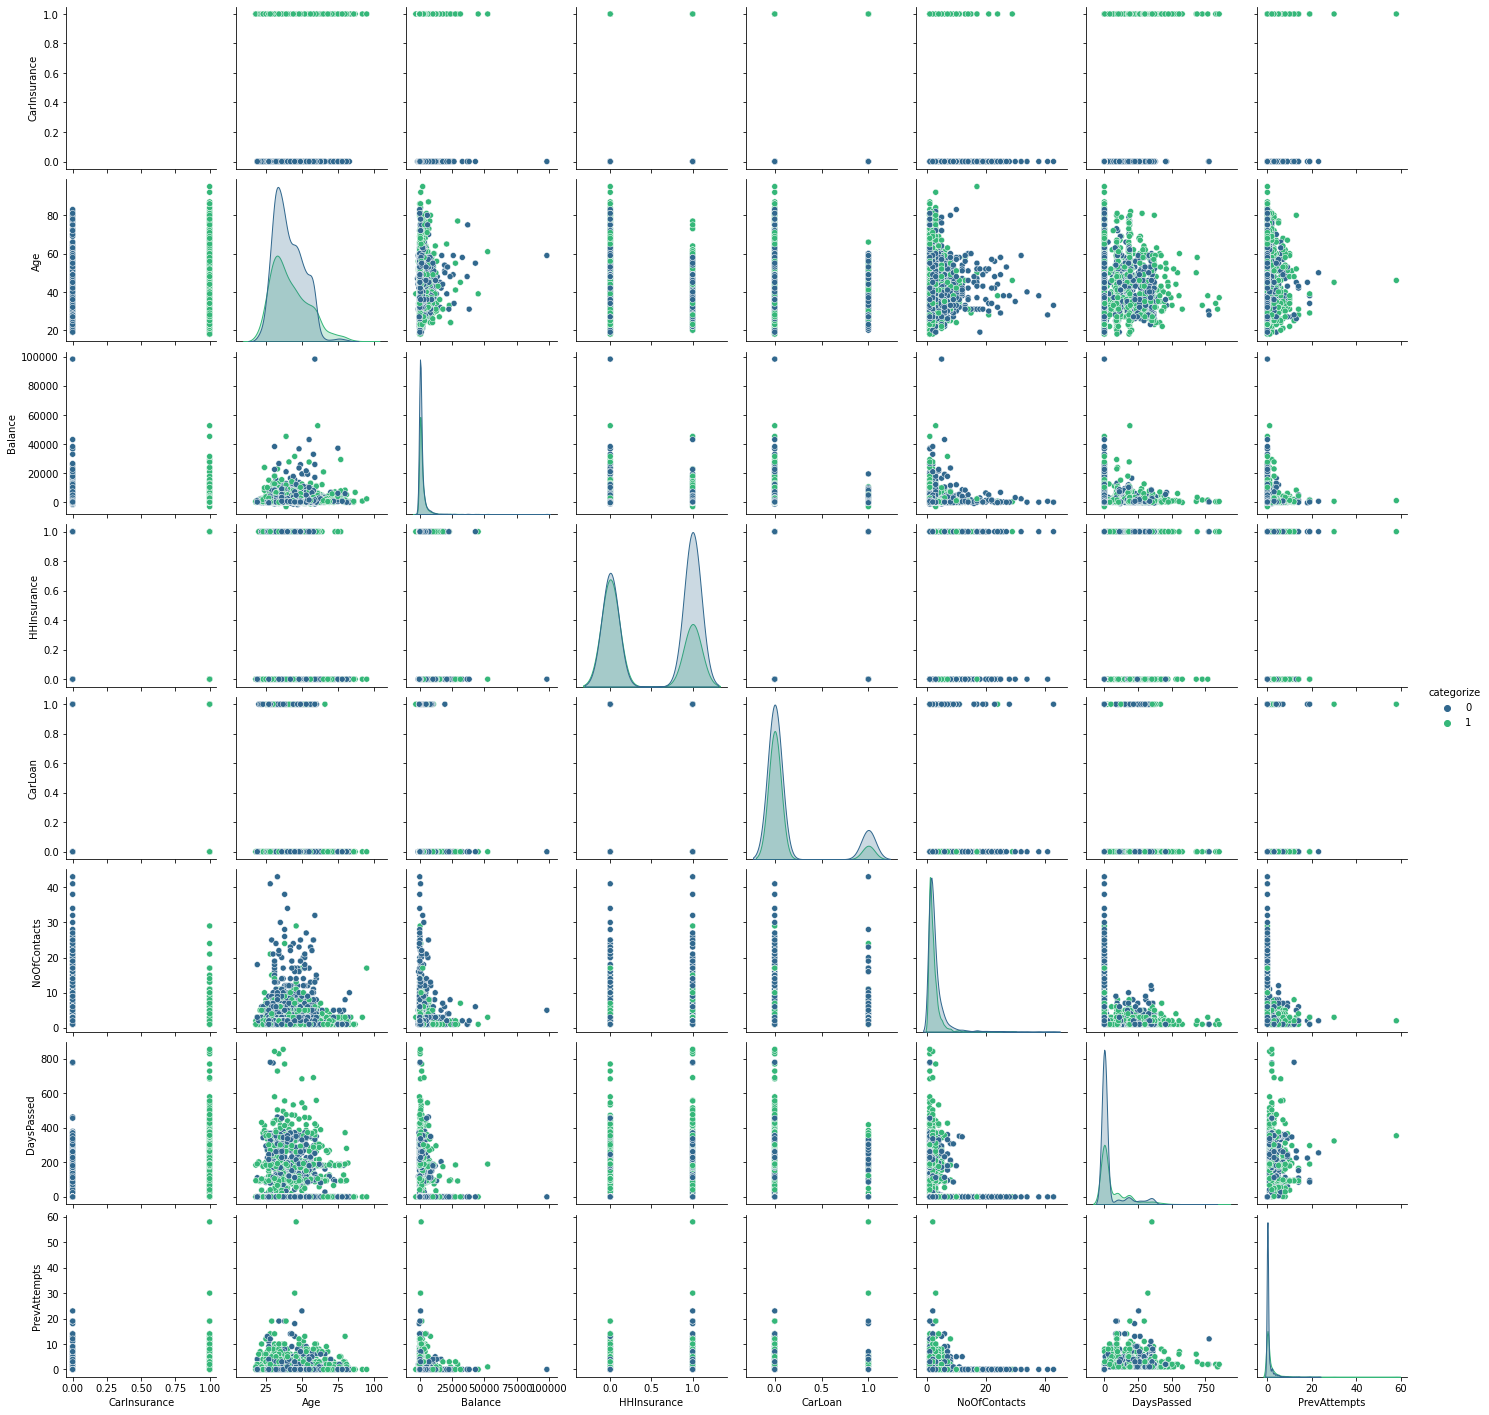

In [77]:
'''
The bottom left triangle portion of the matrix is actually the same and the top right portion of the matrix,
with the axes flipped.
'''
train['categorize']=train['CarInsurance']
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','categorize']
sns.pairplot(train[imp_feats],hue='categorize',palette='viridis',height=2.5)
plt.show()

<br><b>Age</b>: It's interesting to see that seniors are more likely to buy car insurance. 
<br><b>Balance</b>: For balance, the data point at the upper right corner might be an outlier 
<br><b>HHInsurance</b>: Households insured are less likely to buy car insurance 
<br><b>CarLoan</b>: People with car loan are less likely to buy 
<br><b>NoOfContacts</b>: Too many contacts causes customer attrition
<br><b>DaysPassed</b>: It looks like the more day passed since the last contact, the better
<br><b>PrevAttempts</b>: Also, more previous attempts, less likely to buy. There is a potential outlier here 


---

**[seaborn.FacetGrid():](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjS97nAp7b3AhX3gf0HHbXxAOoQFnoECAoQAQ&url=https%3A%2F%2Fseaborn.pydata.org%2Fgenerated%2Fseaborn.FacetGrid.html&usg=AOvVaw2gp_ntuYbv8DoU8zGe9GbX)**

* FacetGrid is basically a grid of subplots. Matplotlib supports creating figures with multiple axes and thus allows to have subplots in one figure. What FacetGrid puts on top of matplotlib’s subplot structure.

  * Making the process easier and smoother (with less code).
  * Transfering the structure of dataset to subplots.

* The distribution of a variable or relationship among variables can easily be discovered with FacetGrids. They can have up to three dimensions: row, column, and hue. 
* FacetGrid object is initialized by passing a dataframe and name of variables to create the structure of axes. The variables used to initialize FacetGrid object needs to be categorical or discrete.
<br>
Good artical about FactGrid [here](https://towardsdatascience.com/seaborn-facetgrid-taking-subplots-further-15ee7af54e44).



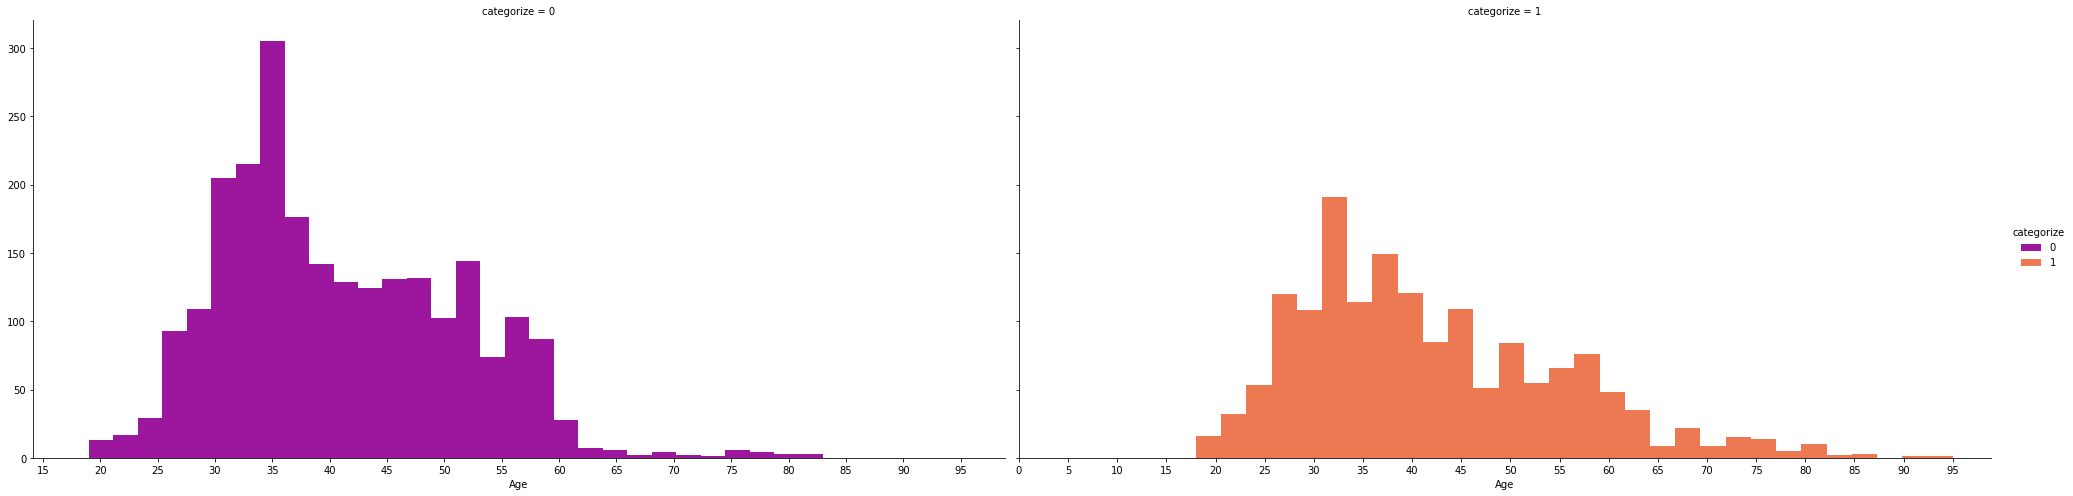

In [78]:
# Take a further look at Age
# Aspect is the ratio of width and height (width=aspect*height). Default value of aspect is 1.
facet = sns.FacetGrid(train,col='categorize', hue='categorize',aspect=2,height=7,palette='plasma') # initialization
# plot data on the grid using FacetGrid.map() method. It takes a plotting function and variable(s) to plot as arguments.
facet.map(plt.hist,'Age',bins=30)
plt.xticks(np.arange(100, step=5))
facet.add_legend()

It looks like young people(<=25 years) and seniors are more likely to buy car insurance from this bank

---


**[seaborn.barplot():](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwis2qD4krr3AhVyMOwKHeWDCQMQFnoECAIQAQ&url=https%3A%2F%2Fseaborn.pydata.org%2Fgenerated%2Fseaborn.barplot.html&usg=AOvVaw15KZsEMTT4iahZjz7AgOSV)**

A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

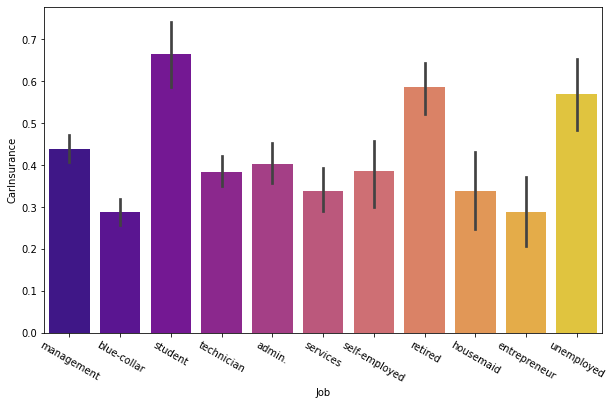

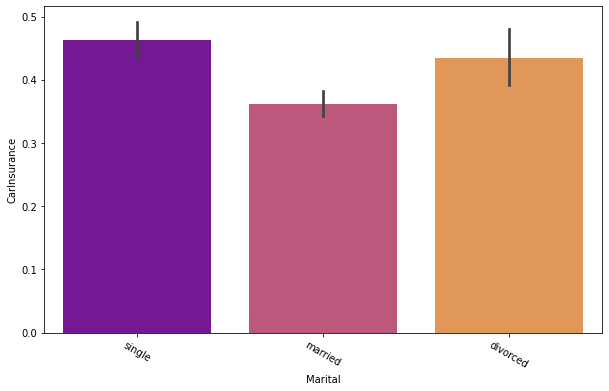

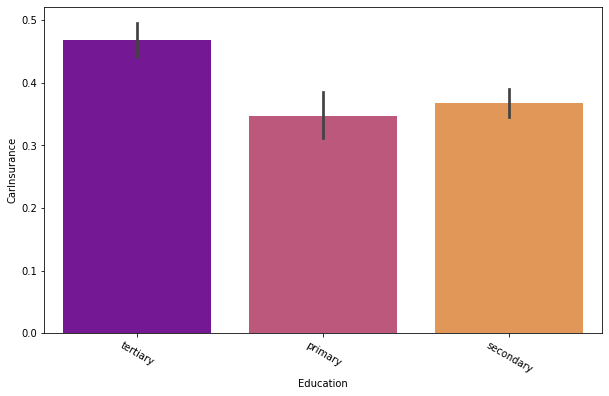

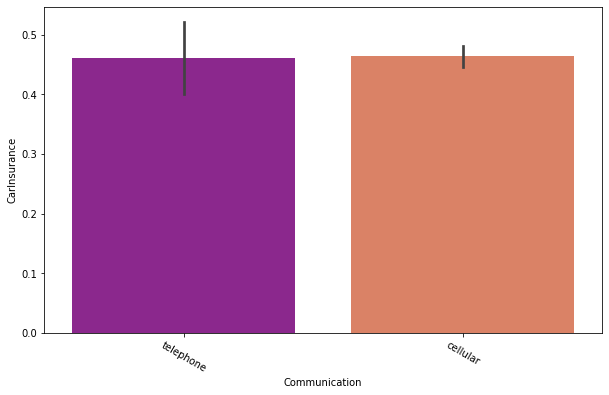

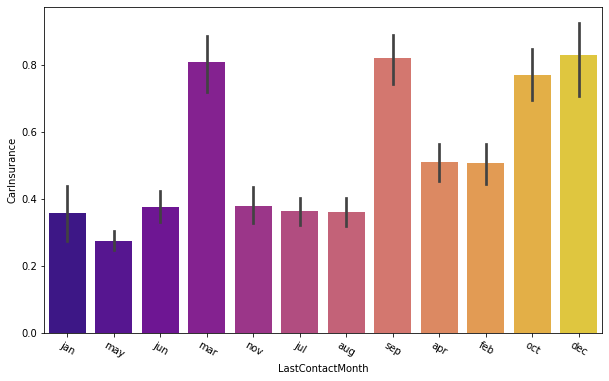

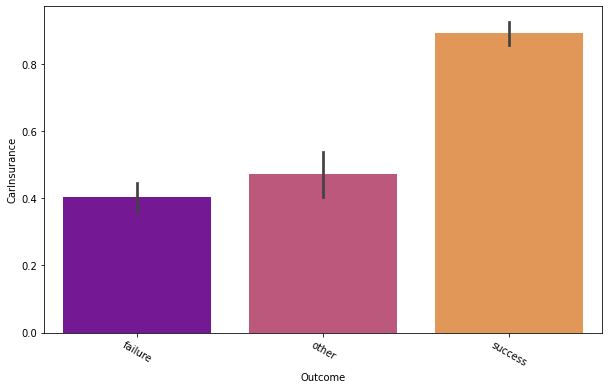

In [79]:
# Next check out categorical features
cat_feats = train.select_dtypes(include=['object']).columns
plt_feats = cat_feats[(cat_feats!= 'CallStart') & (cat_feats!='CallEnd')]
for feature in plt_feats:
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature,y='CarInsurance', data=train,palette='plasma')
    plt.xticks(rotation=-30)

<br> <b>Job</b>: Student are most likely to buy insurance, followed by retired and unemployed folks.This is aligned with the age distribution. There might be some promotion targeting students?
<br> <b>Marital status</b>: Married people are least likely to buy car insurance. Opportunities for developing family insurance business
<br> <b>Education</b>: People with higher education are more likely to buy
<br> <b>Communication</b>: No big difference between cellular and telephone
<br> <b>Outcome in previous campaign</b>: Success in previous marketing campaign is largely associated with success in this campaign
<br> <b>Contact Month</b>: Mar, Sep, Oct, and Dec are the hot months. It might be associated with school season? 

## **Outliers**

In [80]:
# Check outliers
# From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.
train[train['Balance']>80000]
train = train.drop(train[train.index==1742].index)

## **Handling Miss Data**
In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [81]:
# Combine training and test data here in order to process missing values in one go
all=pd.concat([train,test],keys=('train','test'))
all.drop(['CarInsurance','Id','categorize'],axis=1,inplace=True)
print(all.shape)

(4999, 17)


In [82]:
total = all.isnull().sum()
pct = total/all.isnull().count()
NAs = pd.concat([total,pct],axis=1,keys=('Total','Pct'))
print('Missing Values in each columns:\n\n',str(NAs)+'\n\n')
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

Missing Values in each columns:

                   Total       Pct
Age                   0  0.000000
Job                  24  0.004801
Marital               0  0.000000
Education           216  0.043209
Default               0  0.000000
Balance               0  0.000000
HHInsurance           0  0.000000
CarLoan               0  0.000000
Communication      1123  0.224645
LastContactDay        0  0.000000
LastContactMonth      0  0.000000
NoOfContacts          0  0.000000
DaysPassed            0  0.000000
PrevAttempts          0  0.000000
Outcome            3798  0.759752
CallStart             0  0.000000
CallEnd               0  0.000000




,Total,Pct
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [83]:
all_df = all.copy()

# Fill missing outcome as not in previous campaign
all_df[all_df['DaysPassed']==-1].count()
all_df.loc[all_df['DaysPassed']==-1,'Outcome']='NoPrev'

# Fill missing communication with none 
all_df['Communication'].value_counts()
all_df['Communication'].fillna('None',inplace=True)

# Fill missing education with the most common education level by job type
#all_df['Education'].value_counts()

# Create job-education level mode mapping
edu_mode=[]
job_types = all_df.Job.value_counts().index
for job in job_types:
    mode = all_df[all_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=all_df.Job.value_counts().index)

# Apply the mapping to missing eductaion obs
for j in job_types:
    all_df.loc[(all_df['Education'].isnull()) & (all_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]
all_df['Education'].fillna('None',inplace=True)

# Fill missing job with none
all_df['Job'].fillna('None',inplace=True)

# Double check if there is still any missing value
all_df.isnull().sum().sum()

0

## **Feature Engineering**

There are three types of features:
<br><b>Client features</b>: Age, Job, Marital, Education, Default, Balance, HHInsurance, CarLoan
<br><b>Communication features</b>: LastContactDay, LastContactMonth, CallStart, CallEnd, Communication, NoOfContacts, DaysPassed
<br><b>Previous campaign features</b>: PrevAttempts, Outcome


In [84]:
# First simplify some client features
# Create age group based on age bands
#pd.cut(all_df['Age'],5).value_counts(),end='\n\n')

all_df.loc[(all_df['Age']>=15) & (all_df['Age']<30),'AgeBin'] = 1
all_df.loc[(all_df['Age']>=30) & (all_df['Age']<50),'AgeBin'] = 2
all_df.loc[(all_df['Age']>=50) & (all_df['Age']<65),'AgeBin'] = 3
all_df.loc[(all_df['Age']>=65) & (all_df['Age']<80),'AgeBin'] = 4
all_df.loc[(all_df['Age']>=80),'AgeBin'] = 5
all_df['AgeBin'] = all_df['AgeBin'].astype(int)

# Create balance groups
# pd.cut(all_df['Balance'],5).value_counts(),end='\n\n')

all_df.loc[(all_df['Balance']>=-4000) & (all_df['Balance']<-100),'BalanceBin'] = 1
all_df.loc[(all_df['Balance']>=-100) & (all_df['Balance']<4000),'BalanceBin'] = 2
all_df.loc[(all_df['Balance']>=4000),'BalanceBin'] = 3
all_df['BalanceBin'] = all_df['BalanceBin'].astype(int)

all_df = all_df.drop(['Age','Balance'],axis=1)

# Convert education level to numeric 
all_df['Education'] = all_df['Education'].replace({'None':0,'primary':1,'secondary':2,'tertiary':3})


In [85]:
# Next create some new communication Features. This is the place feature engineering coming into play

# Get call length
all_df['CallEnd'] = pd.to_datetime(all_df['CallEnd'])
all_df['CallStart'] = pd.to_datetime(all_df['CallStart'])
all_df['CallLength'] = ((all_df['CallEnd'] - all_df['CallStart'])/np.timedelta64(1,'m')).astype(float)

#pd.cut(all_df['CallLength'],5).value_counts()

# Create call length bins
all_df.loc[(all_df['CallLength']>= 0) & (all_df['CallLength']<11),'CallLengthBin'] = 1
all_df.loc[(all_df['CallLength']>=11) & (all_df['CallLength']<22),'CallLengthBin'] = 2
all_df.loc[(all_df['CallLength']>=22) & (all_df['CallLength']<33),'CallLengthBin'] = 3
all_df.loc[(all_df['CallLength']>=33) & (all_df['CallLength']<44),'CallLengthBin'] = 4
all_df.loc[(all_df['CallLength']>=44) & (all_df['CallLength']<55),'CallLengthBin'] = 5
all_df['CallLengthBin'] = all_df['CallLengthBin'].astype(int)
#all_df = all_df.drop(['CallLength'],axis=1)

# Get call start hour
all_df['CallStartHour'] = all_df['CallStart'].dt.hour
print(all_df[['CallStart','CallEnd','CallLength','CallStartHour']].head())

# Get workday of last contact based on call day and month, assuming the year is 2016
all_df['LastContactDate'] = all_df.apply(lambda x:datetime.datetime.strptime("%s %s %s" %(2016,x['LastContactMonth'],x['LastContactDay']),"%Y %b %d"),axis=1)
all_df['LastContactWkd'] = all_df['LastContactDate'].dt.weekday
#all_df['LastContactWkd'].value_counts()
all_df['LastContactMon'] = all_df['LastContactDate'].dt.month
all_df = all_df.drop('LastContactMonth',axis=1)

# Get week of last contact
all_df['LastContactWk'] = all_df['LastContactDate'].dt.week

# Get num of week in a month. There might be easier ways to do this, I will keep exploring. 
MonWk = all_df.groupby(['LastContactWk','LastContactMon'])['Education'].count().reset_index()
MonWk = MonWk.drop('Education',axis=1)
MonWk['LastContactWkNum']=0
for m in range(1,13):
    k=0
    for i,row in MonWk.iterrows():
        if row['LastContactMon']== m:
            k=k+1
            row['LastContactWkNum']=k
            
def get_num_of_week(df):
    for i,row in MonWk.iterrows():
        if (df['LastContactWk']== row['LastContactWk']) & (df['LastContactMon']== row['LastContactMon']):
            return row['LastContactWkNum']

all_df['LastContactWkNum'] = all_df.apply(lambda x: get_num_of_week(x),axis=1)
print(all_df[['LastContactWkNum','LastContactWk','LastContactMon']].head(10))

                  CallStart             CallEnd  CallLength  CallStartHour
train 0 2022-04-29 13:45:20 2022-04-29 13:46:30    1.166667             13
      1 2022-04-29 14:49:03 2022-04-29 14:52:08    3.083333             14
      2 2022-04-29 16:30:24 2022-04-29 16:36:04    5.666667             16
      3 2022-04-29 12:06:43 2022-04-29 12:20:22   13.650000             12
      4 2022-04-29 14:35:44 2022-04-29 14:38:56    3.200000             14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


         LastContactWkNum  LastContactWk  LastContactMon
train 0                 4              4               1
      1                 4             21               5
      2                 1             22               6
      3                 2             19               5
      4                 1             22               6
      5                 3             20               5
      6                 3             11               3
      7                 2             19               5
      8                 3             46              11
      9                 2             19               5


In [86]:
# Create DaysPassed bins
all_df.loc[(all_df['DaysPassed']>= 0) & (all_df['DaysPassed']<60),'DaysPassedBin'] = 1
all_df.loc[(all_df['DaysPassed']>=60) & (all_df['DaysPassed']<375),'DaysPassedBin'] = 2
all_df.loc[(all_df['DaysPassed']>=375),'DaysPassedBin'] = 3
all_df.loc[all_df.DaysPassed == -1, 'DaysPassedBin'] = -1
#all_df = all_df.drop('DaysPassed',axis=1)

In [87]:
# Total number of calls (in the current and previous campaign)
all_df['TotOfContacts']=all_df['PrevAttempts']+all_df['NoOfContacts']

The two previous campaign features are good to go, no cleaning needed. I also tried to add some interactions and polynomial features, but none of them seems helpful. I am planning to explore more on this.  

## **Assembling Final Datasets**

In [88]:
# Spilt numeric and categorical features
cat_feats = all_df.select_dtypes(include=['object']).columns
num_feats = all_df.select_dtypes(include=['float64','int64']).columns
num_df = all_df[num_feats]
cat_df = all_df[cat_feats]
print('There are %d numeric features and %d categorical features\n' %(len(num_feats),len(cat_feats)))
print('Numeric features:\n',num_feats.values)
print('Categorical features:\n',cat_feats.values)

There are 19 numeric features and 4 categorical features

Numeric features:
 ['Education' 'Default' 'HHInsurance' 'CarLoan' 'LastContactDay'
 'NoOfContacts' 'DaysPassed' 'PrevAttempts' 'AgeBin' 'BalanceBin'
 'CallLength' 'CallLengthBin' 'CallStartHour' 'LastContactWkd'
 'LastContactMon' 'LastContactWk' 'LastContactWkNum' 'DaysPassedBin'
 'TotOfContacts']
Categorical features:
 ['Job' 'Marital' 'Communication' 'Outcome']


In [89]:
# One hot encoding
cat_df = pd.get_dummies(cat_df)

# Merge all features
all_data = pd.concat([num_df,cat_df],axis=1)

# Split train and test
idx=pd.IndexSlice
train_df=all_data.loc[idx[['train',],:]]
test_df=all_data.loc[idx[['test',],:]]
train_label=train['CarInsurance']
print(train_df.shape)
print(test_df.shape)

(3999, 41)
(1000, 41)


In [90]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(train_df,train_label,test_size = 0.3,random_state=3)

In [91]:
# Create a cross validation function 
def get_best_model(estimator, params_grid={}):
    
    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=3, scoring="accuracy", n_jobs= -1)
    model.fit(x_train,y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

# Create a model fitting function
def model_fit(model,feature_imp=True,cv=5):

    # model fit   
    clf = model.fit(x_train,y_train)
    
    # model prediction     
    y_pred = clf.predict(x_test)
    
    # model report   
     
    cm = confusion_matrix(y_test,y_pred)
    
    plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

    print('\n--- Train Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
    print('F1: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='f1')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='f1'))))
    print('\n--- Validation Set -----------------------------')    
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
    print('F1: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='f1')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='f1'))))
    print('-----------------------------------------------') 

    # feature importance 
    if feature_imp:
        feat_imp = pd.Series(clf.feature_importances_,index=all_data.columns)
        feat_imp = feat_imp.nlargest(15).sort_values()
        plt.figure()
        feat_imp.plot(kind="barh",figsize=(6,8),title="Most Important Features")
    
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Success','Failure']




---


**k-Nearest Neighbors (KNN)**


---




--- Best Parameters -----------------------------
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

--- Best Model -----------------------------
KNeighborsClassifier(weights='distance')

--- Train Set -----------------------------
Accuracy: 0.81459 +/- 0.0208
F1: 0.75699 +/- 0.0295

--- Validation Set -----------------------------
Accuracy: 0.76167 +/- 0.0201
F1: 0.68041 +/- 0.0355
-----------------------------------------------


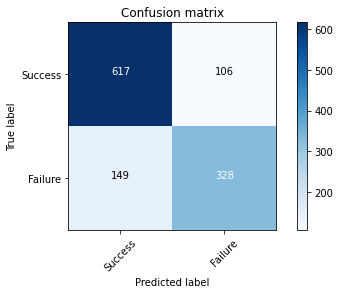

In [92]:
# Let's start with KNN. An accuracy of 0.76 is not very impressive. I will just take this as the model benchmark. 
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5,7,8], 
              'p':[1,2],
              'weights':['uniform','distance']}
clf_knn = get_best_model(knn,parameters)
model_fit(model=clf_knn, feature_imp=False)



---


**Naive Bayes Classifier**


---




--- Train Set -----------------------------
Accuracy: 0.75027 +/- 0.0121
F1: 0.67937 +/- 0.0160

--- Validation Set -----------------------------
Accuracy: 0.72667 +/- 0.0166
F1: 0.65033 +/- 0.0297
-----------------------------------------------


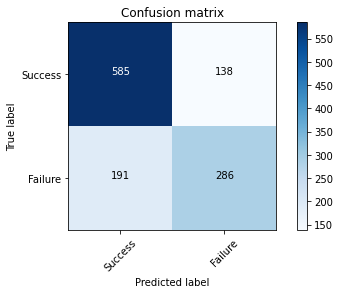

In [93]:
# As expected, Naive Bayes classifier doesn't perform well here. 
# There are multiple reasons. Some of the numeric features are not normally distributed, which is a strong assemption hold by Naive Bayes. 
# Also, features are definitely not independent.  
clf_nb = GaussianNB()
model_fit(model=clf_nb,feature_imp=False)



---


**Logistic Regression**


---




--- Best Parameters -----------------------------
{'C': 1, 'penalty': 'l2'}

--- Best Model -----------------------------
LogisticRegression(C=1, random_state=3, solver='newton-cg')

--- Train Set -----------------------------
Accuracy: 0.81780 +/- 0.0125
F1: 0.76340 +/- 0.0159

--- Validation Set -----------------------------
Accuracy: 0.80750 +/- 0.0143
F1: 0.74571 +/- 0.0207
-----------------------------------------------


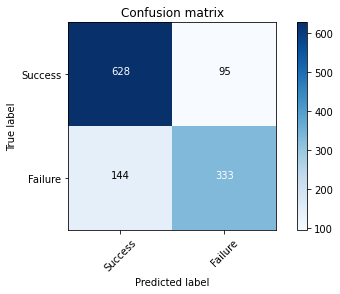

In [99]:
# We're making progress here. Logistic regression performs better than KNN. 
lg = LogisticRegression(random_state=3,solver='newton-cg')
parameters = {'C':[1], 
              'penalty':['l2']}
clf_lg = get_best_model(lg,parameters)
model_fit(model=clf_lg, feature_imp=False)



---


**Random Forest**


---




--- Best Parameters -----------------------------
{'max_depth': 12, 'max_features': 14, 'min_samples_split': 11, 'n_estimators': 100}

--- Best Model -----------------------------
RandomForestClassifier(max_depth=12, max_features=14, min_samples_split=11,
                       random_state=3)

--- Train Set -----------------------------
Accuracy: 0.85067 +/- 0.0063
F1: 0.81690 +/- 0.0084

--- Validation Set -----------------------------
Accuracy: 0.82167 +/- 0.0138
F1: 0.77172 +/- 0.0234
-----------------------------------------------


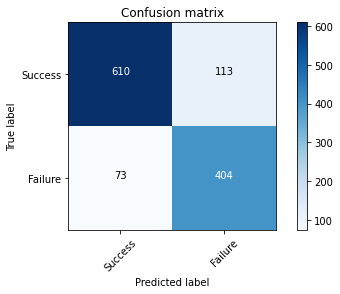

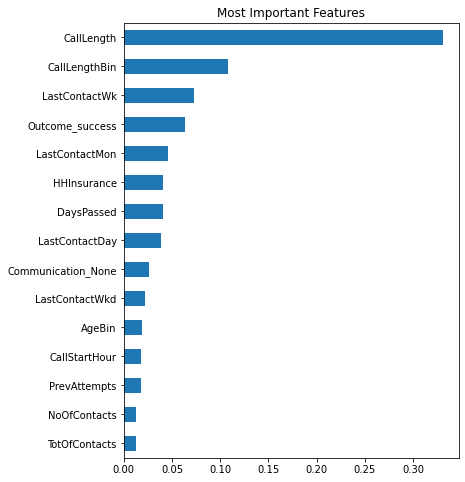

In [100]:
# I did some manual parameter tuning here. This is the best model so far. 
# Based on the feature importance report, call length, last contact week, and previous success are strong predictors of cold call success
rf = RandomForestClassifier(random_state=3)
parameters={'n_estimators':[100],
            'max_depth':[12],
            'max_features':[13,14],
            'min_samples_split':[11]}
clf_rf= get_best_model(rf,parameters)
model_fit(model=clf_rf, feature_imp=True)



---


**Support Vector Machines**


---




--- Best Parameters -----------------------------
{'C': 5, 'gamma': 0.01}

--- Best Model -----------------------------
SVC(C=5, gamma=0.01, probability=True, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.82709 +/- 0.0194
F1: 0.78480 +/- 0.0222

--- Validation Set -----------------------------
Accuracy: 0.78000 +/- 0.0161
F1: 0.72117 +/- 0.0306
-----------------------------------------------


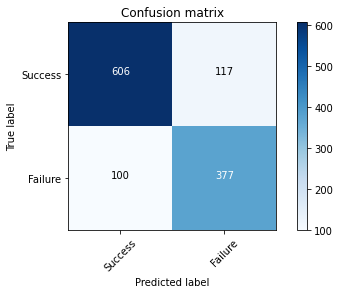

In [101]:
# try a SVM RBF model 
svc = svm.SVC(kernel='rbf', probability=True, random_state=3)
parameters = {'gamma': [0.005,0.01,0.02],
              'C': [0.5,1,5]}
clf_svc = get_best_model(svc, parameters)
model_fit(model=clf_svc,feature_imp=False)



---
**AdaBoostClassifier**


---





--- Train Set -----------------------------
Accuracy: 0.82637 +/- 0.0132
F1: 0.77853 +/- 0.0158

--- Validation Set -----------------------------
Accuracy: 0.80167 +/- 0.0215
F1: 0.74178 +/- 0.0358
-----------------------------------------------


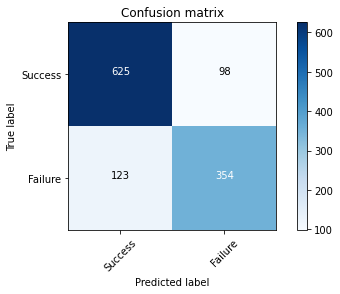

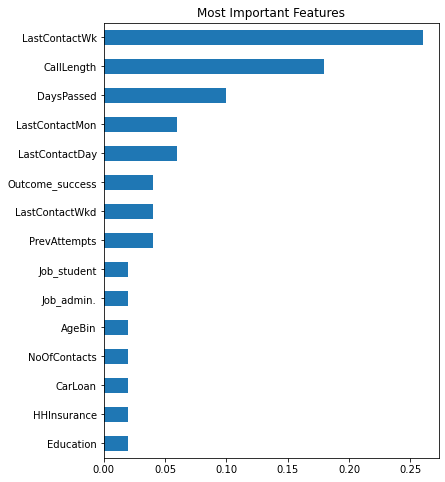

In [102]:
adaboost = AdaBoostClassifier()
model_fit(model=adaboost, feature_imp=True)



---


**XGBoost**


---




--- Best Parameters -----------------------------
{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.8}

--- Best Model -----------------------------
XGBClassifier(colsample_bytree=0.3, learning_rate=0.01, max_depth=10,
              min_child_weight=3, n_estimators=1000, subsample=0.8)

--- Train Set -----------------------------
Accuracy: 0.85388 +/- 0.0071
F1: 0.81731 +/- 0.0110

--- Validation Set -----------------------------
Accuracy: 0.83083 +/- 0.0186
F1: 0.78314 +/- 0.0244
-----------------------------------------------


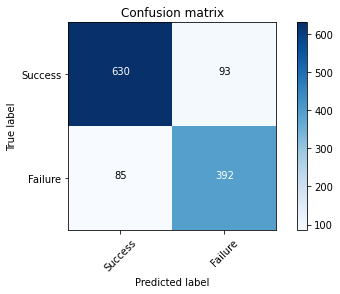

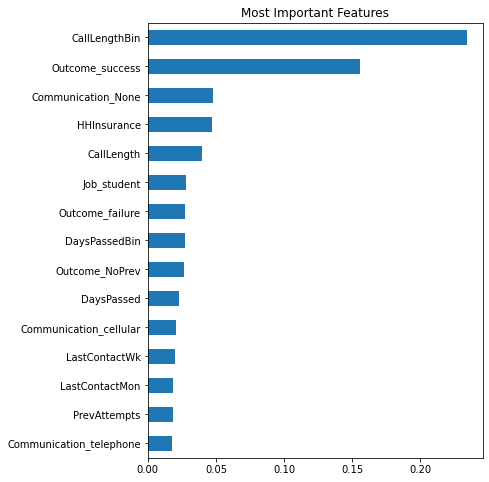

In [104]:
# Finally let's try out XBGoost. As expected, it outperforms all other algorithms. 
# Also, based on feature importances, some of the newly created features such as call start hour, last contact week and weekday 
# have been picked as top features. 

import xgboost as xgb
xgb = xgb.XGBClassifier()
parameters={'n_estimators':[1000],
            'learning_rate':[0.01],
            'max_depth':[10],
            'min_child_weight':[1,3],
            'subsample':[0.8],
            'colsample_bytree':[0.3,0.4,0.5]}
clf_xgb= get_best_model(xgb,parameters)
model_fit(model=clf_xgb, feature_imp=True)



---
**LGBM**


---




--- Best Parameters -----------------------------
{'boosting_type': 'dart', 'colsample_bytree': 0.5, 'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 1000}

--- Best Model -----------------------------
XGBClassifier(boosting_type='dart', colsample_bytree=0.5, learning_rate=0.01,
              min_child_weight=5, n_estimators=1000)

--- Train Set -----------------------------
Accuracy: 0.84638 +/- 0.0110
F1: 0.80805 +/- 0.0134

--- Validation Set -----------------------------
Accuracy: 0.82750 +/- 0.0104
F1: 0.77551 +/- 0.0160
-----------------------------------------------


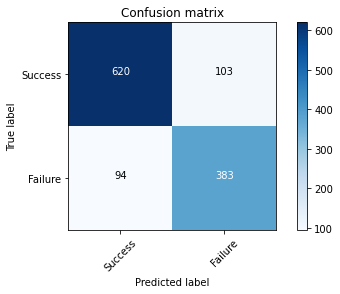

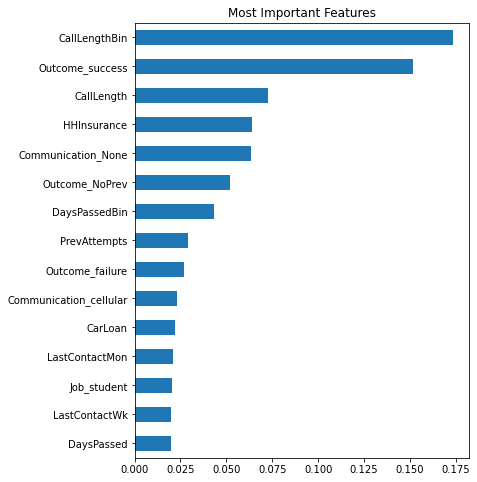

In [105]:
lgbm = lgb.LGBMClassifier(random_state=3)
parameters={'n_estimators':[1000],
            'boosting_type':['dart','gbdt'],
            'learning_rate':[0.01],
            'min_child_weight':[5,3],
            'colsample_bytree':[0.3,0.4,0.5]}
clf_lgbm= get_best_model(xgb,parameters)
model_fit(model=clf_lgbm, feature_imp=True)

## **Model Evaluation**

In [116]:
# Compare model performance
clfs= [clf_knn, clf_nb, clf_lg, clf_rf, clf_svc,adaboost, clf_xgb,clf_lgbm]
index =['K-Nearest Neighbors','Naive Bayes','Logistic Regression','Random Forest','Support Vector Machines','AdaBoost','XGBoost','LightGbm']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)

models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

XGBoost                    0.830833
LightGbm                   0.827500
Random Forest              0.821667
Logistic Regression        0.807500
AdaBoost                   0.801667
Support Vector Machines    0.780000
K-Nearest Neighbors        0.761667
Naive Bayes                0.726667
dtype: float64

## **Ensemble Voting**

In [117]:
# XGBoost and Random Forest show different important features, implying that those models are capturing different aspects of the data
# To get the final model, I ensembled different classifiers based on majority voting.
# XGBoost and Random Forest are given larger weights due to their better performance. 

clf_vc = VotingClassifier(estimators=[('xgb', clf_xgb),                                       
                                      ('rf', clf_rf),
                                      ('lg', clf_lg), 
                                      ('lgbm', clf_lgbm)], 
                          voting='hard',
                          weights=[4,4,1,2])
clf_vc = clf_vc.fit(x_train, y_train)

In [118]:
print('Final Model Accuracy: %.5f'%(accuracy_score(y_test, clf_vc.predict(x_test))))
print('Final Model F1-Score: %.5f'%(f1_score(y_test, clf_vc.predict(x_test))))

Final Model Accuracy: 0.84583
Final Model F1-Score: 0.81026
